## Similarity Tutorial

This notebook is a showcase of the file similarity tools supported by this library. These features are restricted to document-based file types (ex. pdf, word, txt)

- **UC1**: Comparing 2 `File` objects by cosine similarity
- **UC2**: Comparing 2 `File` objects by Levenshtein distance 
- **UC3**: Comparing all files in a directory against each other by cosine similarity
- **UC4**: Indexing all files in a directory using FAISS indices and returning the most similar files to each file

### UC1: Comparing files by cosine similarity

In [1]:
from file_processing import File

a = File('./tests/resources/similarity_test_files/CPP_disability_benefits.txt')
b = File('./tests/resources/similarity_test_files/CPP_retirement_pension.txt')

In [2]:
# Returns cosine similarity for 2 document-based files

from file_processing import CosineSimilarity

CosineSimilarity(a, b).calculate()

0.6715940803327793

### UC2: Comparing files by Levenshtein distance

In [3]:
# Returns Levenshtein distance for 2 document-based files

from file_processing.similarity import LevenshteinDistance

LevenshteinDistance(a, b).calculate()

4135

### UC3: Comparing all files in a directory against each other

To compare all files, set `threshold=0`. This indicates that all results should be returned regardless their similarity score. This calculation uses cosine similarity, so the range of similarity scores will be between -1 and 1

In [4]:
from file_processing import Directory

directory = Directory('./tests/resources/similarity_test_files/')

In [5]:
directory.identify_duplicates(
    report_file='./docs/sample_reports/similarity_cosine.csv',  # output CSV report
    filters={},  # filters to exclude/include files from directory
    threshold=0,  # set to 0 for cosine similarity
    use_abs_path=False  # whether to show absolute paths in the report
)

Processing files: 100%|██████████| 20/20 [00:00<00:00, 65.67file/s]
c:\Users\BLUO\Downloads\report\.venv\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


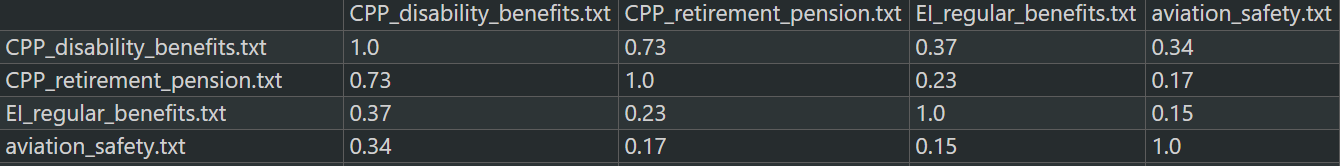

### UC4: Indexing files in a directory and showing top matches

This implementation uses FAISS indices. To enable this, set `threshold` to a non-zero value, which indicates that only certain similarity scores higher than `threshold` should be returned. The similarity scores are in the range of 0 to 1.

In addition, there is an option to return the `top_n` files that satisfy the defined `threshold` score. Any empty cells in the report represent that the top nth most similar file does not satisfy the defined `threshold` cutoff

In [6]:
directory.identify_duplicates(
    report_file='./docs/sample_reports/similarity_faiss.csv',  # output CSV report
    filters={},  # filters to exclude/include files from directory
    threshold=0.5,  # set to non-zero value for FAISS indices
    top_n=2,  # the top n files to return, subject to satisfying the threshold score
    use_abs_path=False  # whether to show absolute paths in the report
)

Processing files: 100%|██████████| 20/20 [00:00<00:00, 64.95file/s]


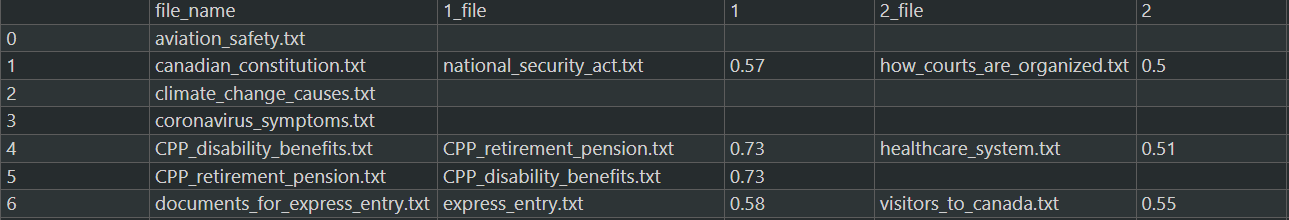